# Assignment A8-1 Artificial Neural Network
Create and train ANN for recognition of handwritten digits.

[Reference](https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow)
[Reference](https://nextjournal.com/gkoehler/digit-recognition-with-keras)


## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import load_model, Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Using TensorFlow backend.


## Loading and splitting the data

In [2]:
# Loading and splitting the data into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualize a few examples of the data

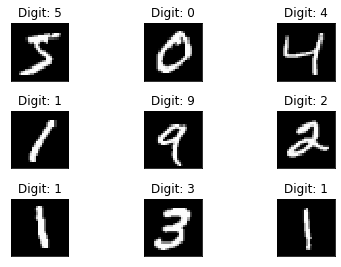

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

## Preparing the data

In [4]:
# printing the shapes of train and test data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Reshape inputs to a single vector and normalize the pixel values to lie between 0 and 1.

In [5]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


We are using one-hot-encoding to represent the labels (the actual digit drawn, e.g. “3”) of the images.

One-hot-encoding uses a vector of binary values to represent numeric or categorical values. As our labels are for the digits 0-9, the vector contains ten values, one for each possible digit. One of these values is set to 1, to represent the digit at that index of the vector, and the rest are set to 0. 

For example, the digit 3 is represented using the vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. As the value at index 3 is stored as 1, the vector therefore represents the digit 3.

In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Building the model

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential([
    Dense(512, input_shape=(784,)),
    Activation('relu'),
    Dropout(0.2),
    Dense(512),
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('softmax'),
])

## Compiling and training the model

In [11]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
# training the model
history = model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.2478 - accuracy: 0.9265 - val_loss: 0.1053 - val_accuracy: 0.9671
Epoch 2/20
 - 7s - loss: 0.1021 - accuracy: 0.9687 - val_loss: 0.0804 - val_accuracy: 0.9751
Epoch 3/20
 - 8s - loss: 0.0703 - accuracy: 0.9786 - val_loss: 0.0682 - val_accuracy: 0.9785
Epoch 4/20
 - 7s - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0593 - val_accuracy: 0.9819
Epoch 5/20
 - 7s - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0649 - val_accuracy: 0.9813
Epoch 6/20
 - 8s - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0718 - val_accuracy: 0.9811
Epoch 7/20
 - 9s - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0643 - val_accuracy: 0.9822
Epoch 8/20
 - 8s - loss: 0.0308 - accuracy: 0.9895 - val_loss: 0.0724 - val_accuracy: 0.9794
Epoch 9/20
 - 9s - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0702 - val_accuracy: 0.9817
Epoch 10/20
 - 8s - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0641 - val_accuracy: 0.9831
Epoch 11/20
 - 9s -

In [13]:
# saving the model
save_dir = "/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week17/models/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week17/models/keras_mnist.h5 


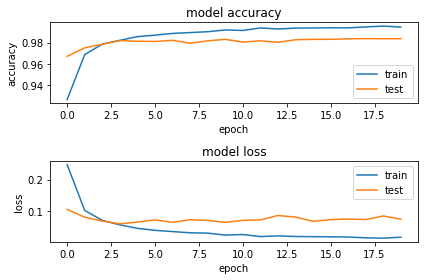

In [14]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [15]:
file_path = "/Users/pernillelorup/Desktop/Softwareudvikling/AI/DeepLearning/week17/models/keras_mnist.h5"
loss_and_metrics = load_model(file_path).evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07398687656056682
Test Accuracy 0.9836999773979187



9837  classified correctly
163  classified incorrectly


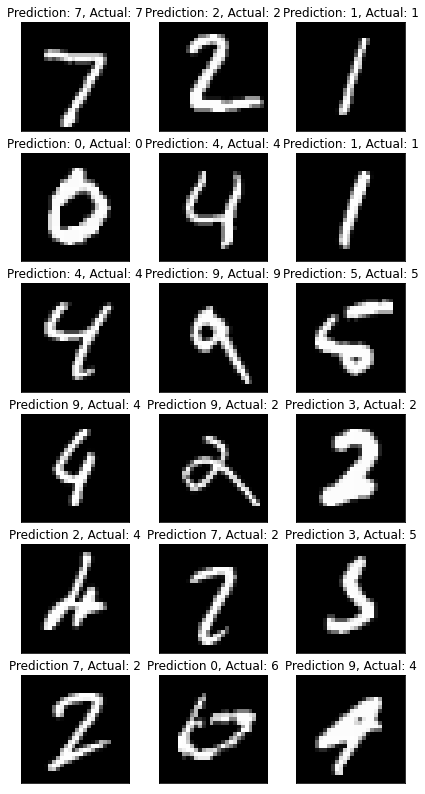

In [16]:
# load the model and create predictions on the test set
mnist_model = load_model(file_path)
predicted_classes = mnist_model.predict_classes(X_test)

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

# see correct and incorrect predictions
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction: {}, Actual: {}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction {}, Actual: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])